In [1]:
import numpy as np                  # Arrays
import random                       # Random number generation 
import matplotlib.pyplot as plt     # General visualization
import networkx as nx               # Graph visualization 

from tqdm import tqdm
import itertools


We model the floor plans of warehouses as graphs; nodes representing locations where stock is shelved and edges indicate an uninterrupted path between two locations.

A general process for making adjacency list representations of such graphs is required.

(1, 1)
(1, 3)
(3, 1)
(3, 3)


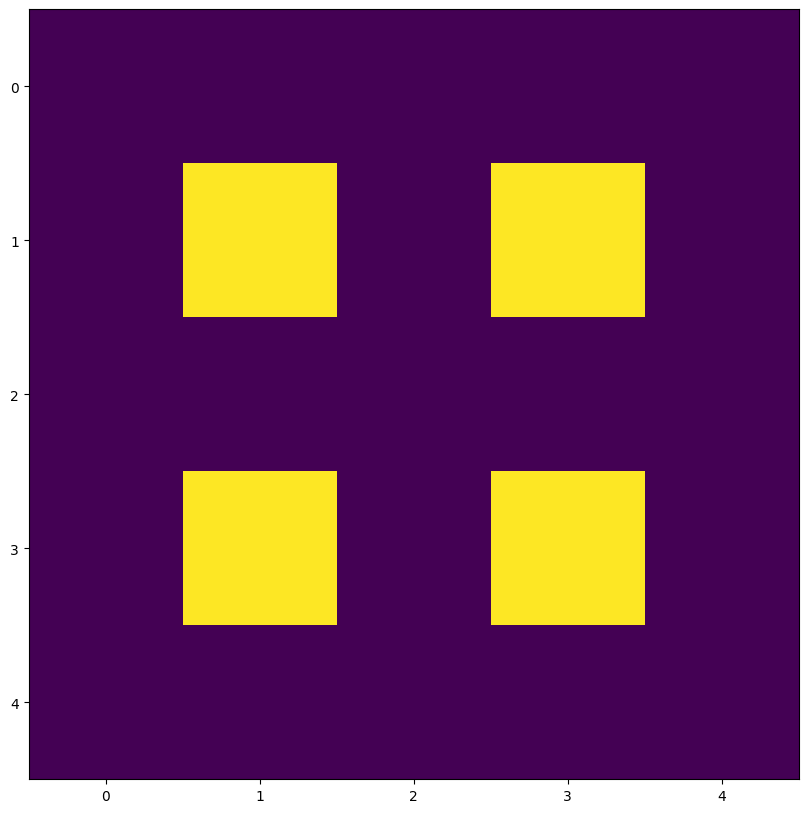

In [8]:
SHELF_SIZE = np.array([1, 1])
GAP_SIZE = np.array([1, 1])
NUM_SHELVES = np.array([2, 2])

GRID_SIZE = NUM_SHELVES*(GAP_SIZE + SHELF_SIZE) + GAP_SIZE

grid = np.zeros(GRID_SIZE)

for index, value in np.ndenumerate(grid):
    if np.all(((index) % (GAP_SIZE + SHELF_SIZE) >= GAP_SIZE)):
        grid[index] = 1 
        print(index)


plt.figure(figsize = (10, 10))
plt.imshow(grid)
plt.show()



Iterating through grid to store location nodes.

In [3]:
class Node():
    def __init__(self):
        self.index = -1
        self.tickets = []
        self.adjacent_indices = []
        self.location = [-1, -1]


In [4]:
shelves_vertical = SHELF_SIZE[0] >= SHELF_SIZE[1]

NUM_NODES = np.product(GRID_SIZE) - (np.product(NUM_SHELVES)*np.product(SHELF_SIZE))

nodes = np.empty(shape = (NUM_NODES), dtype = Node)

# Each ticket is defined by a ticket row and col, not to be confused with
# the simulation grid row and col indexes. [ticket_row, ticket_col, index_of_access_node]
tickets = []

current_index = 0
location_to_index = {}
for (row, col), value in np.ndenumerate(grid):
    if (value == 0):
        location_to_index[str([row, col])] = current_index
    current_index += 1

all_moves = list(itertools.product([-1,0,1], repeat=2))
all_moves.remove((0,0))
all_moves = np.array(all_moves)

current_index = 0
for (row, col), value in np.ndenumerate(grid):
    if (value == 0):
        
        nodes[current_index] = Node()
        nodes[current_index].index = current_index
        nodes[current_index].location = [row, col]
        
        neighbours = all_moves + np.array([(row, col) for i in range(8)])
        neighbours = [list(val) for val in neighbours if np.all(val >= 0) 
                      and val[0] < GRID_SIZE[0] and val[1] < GRID_SIZE[1]]
        neighbours = [val for val in neighbours 
                            if abs(sum(np.array([row, col])-val)) == 1]
       
        for (r, c) in neighbours:
            if grid[r, c] == 0:
                tile_size = GAP_SIZE + SHELF_SIZE
                adj_index = r*c - (r//tile_size[0])
                nodes[current_index].adjacent_indices.append(location_to_index[str([r,c])])

        if shelves_vertical:
            if col-1 > 0:
                if grid[row, col-1] == 1:
                    ticket = [row, col, current_index]
                    nodes[current_index].tickets.append(ticket)
                    tickets.append(ticket)
            if col+1 < GRID_SIZE[1]:
                if grid[row, col+1] == 1:
                    ticket = [row, col, current_index]
                    nodes[current_index].tickets.append(ticket)
                    tickets.append(ticket)
        else:

            if row-1 > 0:
                if grid[row-1, col] == 1:
                    ticket = [row, col, current_index]
                    nodes[current_index].tickets.append(ticket)
                    tickets.append(ticket)

            if row+1 < GRID_SIZE[0]:
                if grid[row+1, col] == 1:
                    ticket = [row, col, current_index]
                    nodes[current_index].tickets.append(ticket)
                    tickets.append(ticket)

        current_index += 1

print(tickets)
print((np.product(NUM_SHELVES)*np.product(SHELF_SIZE)))



[[1, 0, 5], [1, 2, 6], [1, 2, 6], [1, 4, 7], [3, 0, 13], [3, 2, 14], [3, 2, 14], [3, 4, 15]]
4


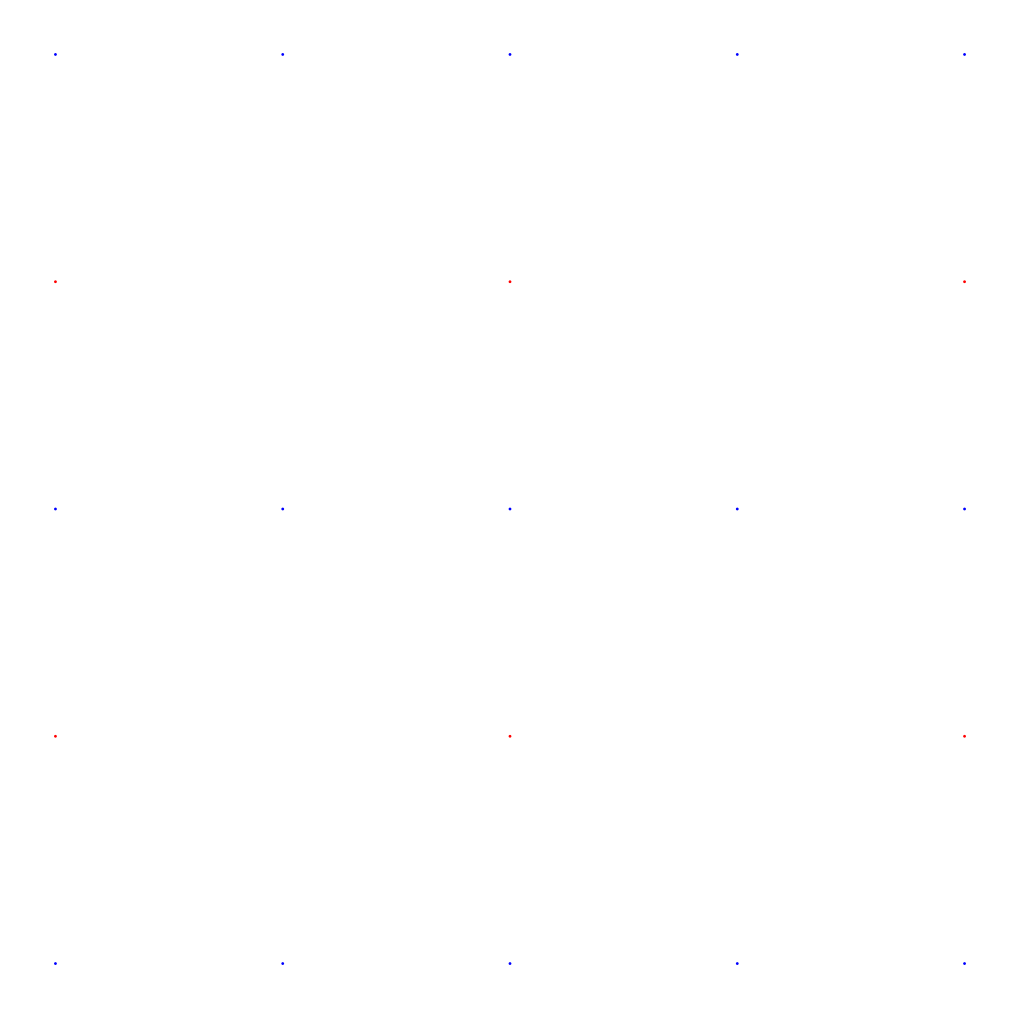

In [5]:
graph = nx.Graph()

for index, node_obj in enumerate(nodes):
    if len(node_obj.tickets)>0:
        color = 'red'
    else:
        color = 'blue'
    graph.add_node(index, 
                   pos = (node_obj.location[1], node_obj.location[0]),
                   color = color
                  )


#for index, node_obj in enumerate(nodes):
    #for adj_index in node_obj.adjacent_indices:
        #graph.add_edge(index, adj_index)

plt.figure(figsize = (10, 10))
pos=nx.get_node_attributes(graph,'pos')
color = nx.get_node_attributes(graph,'color')
nx.draw(graph, pos, node_color = color.values(), node_size = 1)
plt.show()
    